In [13]:
from pushforward_operators.fast_non_linear_vector_quantile_regression.vqr import VectorQuantileRegressor
from pushforward_operators.fast_non_linear_vector_quantile_regression.vqr.solvers.regularized_lse import MLPRegularizedDualVQRSolver
from datasets import FunnelDistribution

dataset = FunnelDistribution({})
X_tensor, Y_tensor = dataset.sample_joint(n_points=10000)

nonlinear_solver = MLPRegularizedDualVQRSolver(
    verbose=True,
    T=100,
    num_epochs=1000,
    epsilon=1e-5,
    lr=0.1,
    gpu=True,
    skip=False,
    batchnorm=False,
    hidden_layers=(2, 10, 10),
    batchsize_y=32,
    batchsize_u=32,
    inference_batch_size=100,
    lr_factor=0.9,
    lr_patience=300,
    lr_threshold=0.5 * 0.001,
)
vqr = VectorQuantileRegressor(solver=nonlinear_solver)
vqr.fit(X_tensor, Y_tensor)

/Users/vladimir.kondratyev/conditional_quantile_function/src/pushforward_operators/fast_non_linear_vector_quantile_regression/vqr/solvers/regularized_lse.py:190: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_th = tensor(Y, **dtd)


  0%|                                                                  | 0/1000 [00:00<?, ?epochs/s]

,solver,MLPRegularize...ver(eps=1e-05)
,solver_opts,{}


In [14]:
import torch

X_test = torch.linspace(-10, 10, 100).unsqueeze(-1)
Y_test = vqr.predict(X=X_test)
X_test = X_test.unsqueeze(-1).repeat(1, 1, Y_test.shape[-1])

In [15]:
# Y_test.shape, X_test.unsqueeze(-1).repeat(1, 1, Y_test.shape[-1]).shape

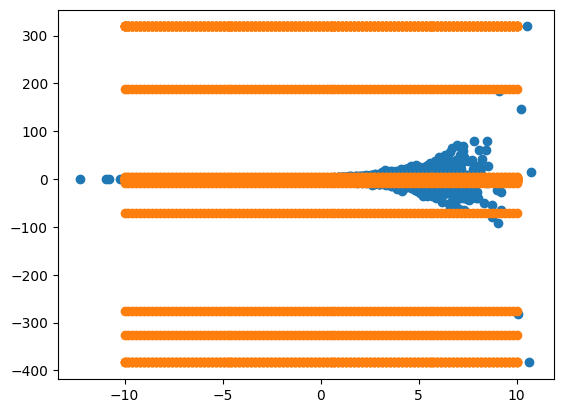

In [16]:
import matplotlib.pyplot as plt

plt.scatter(X_tensor.flatten(), Y_tensor.flatten())
plt.scatter(X_test.flatten(), Y_test.flatten())